In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [3]:
pd.set_option('display.max_rows', 200)
data_path = "lending-club-loan-data/loan.csv"

## Load & Preprocess Data

In [4]:
# LOAD ALL DATA

loan_df = pd.read_csv(data_path)
print(loan_df.shape)
loan_df.head()

/Users/Fyxstkala/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Values

In [5]:
def get_percent_null_val(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
    return missing_value_df

missing_value_df = get_percent_null_val(loan_df)
missing_value_df

,column_name,percent_missing
id,id,100.000000
url,url,100.000000
member_id,member_id,100.000000
orig_projected_additional_accrued_interest,orig_projected_additional_accrued_interest,99.627278
hardship_length,hardship_length,99.530537
hardship_reason,hardship_reason,99.530537
hardship_status,hardship_status,99.530537
deferral_term,deferral_term,99.530537
hardship_amount,hardship_amount,99.530537
hardship_start_date,hardship_start_date,99.530537


In [6]:
col_to_remove = missing_value_df.loc[missing_value_df.percent_missing>80].column_name.tolist()
print(len(col_to_remove))
df = loan_df.drop(col_to_remove, axis=1).dropna()
print(df.shape)
df.head()

39
(75170, 106)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
8,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Legal Assistant III,10+ years,...,60.0,0.0,0.0,57426.0,41882.0,21500.0,34626.0,N,Cash,N
18,16000,16000,16000.0,60 months,20.89,431.87,D,D4,Neonatal Nurse Practitioner,4 years,...,100.0,0.0,0.0,444217.0,266754.0,13500.0,239338.0,N,Cash,N
23,3500,3500,3500.0,36 months,20.89,131.67,D,D4,gas attendant,10+ years,...,0.0,0.0,0.0,217000.0,26902.0,5000.0,25000.0,N,Cash,N
31,10000,10000,10000.0,60 months,19.92,264.50,D,D3,Material Handler,10+ years,...,50.0,0.0,0.0,170230.0,37606.0,8000.0,55030.0,N,Cash,N
32,16000,16000,16000.0,60 months,17.97,406.04,D,D1,Instructional Coordinator,5 years,...,0.0,0.0,0.0,67924.0,39339.0,29500.0,38424.0,N,Cash,N


### Feature Selection

In [226]:
loan_df['emp_length'].value_counts()

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [227]:
loan_df['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

In [396]:
df = loan_df[['home_ownership','annual_inc','delinq_2yrs','emp_length','grade','loan_status','mort_acc',
              'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mths_since_last_delinq','inq_fi','open_acc',
              'pub_rec','pub_rec_bankruptcies','revol_util','sub_grade','total_acc','int_rate',
              'total_rev_hi_lim', 'total_bal_il','tot_cur_bal','dti', 'total_bc_limit',
              'total_cu_tl','pct_tl_nvr_dlq','percent_bc_gt_75']].dropna()
print(df.shape)
df.head()

(614760, 26)


,home_ownership,annual_inc,delinq_2yrs,emp_length,grade,loan_status,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_last_delinq,...,total_acc,int_rate,total_rev_hi_lim,total_bal_il,tot_cur_bal,dti,total_bc_limit,total_cu_tl,pct_tl_nvr_dlq,percent_bc_gt_75
1,MORTGAGE,90000.0,0.0,10+ years,D,Current,3.0,163.0,378.0,71.0,...,44.0,18.94,50800.0,87153.0,321915.0,26.52,15000.0,15.0,95.0,0.0
8,MORTGAGE,53580.0,0.0,10+ years,D,Current,3.0,145.0,244.0,32.0,...,38.0,17.97,22800.0,33864.0,41882.0,21.16,21500.0,1.0,78.9,60.0
9,OWN,300000.0,1.0,< 1 year,C,Current,1.0,166.0,200.0,17.0,...,58.0,14.47,132500.0,39961.0,349502.0,17.43,98300.0,2.0,100.0,26.3
10,MORTGAGE,50000.0,1.0,< 1 year,D,Current,3.0,139.0,105.0,22.0,...,13.0,22.35,4800.0,13656.0,228151.0,15.94,4800.0,0.0,84.6,100.0
13,MORTGAGE,154000.0,2.0,4 years,D,Current,0.0,122.0,74.0,6.0,...,41.0,17.97,39300.0,92993.0,116747.0,28.78,12300.0,3.0,90.2,20.0


In [397]:
# Get X and y dataframes
df0 = df.drop(['loan_status','grade','sub_grade','int_rate','home_ownership'], axis=1)
print(type(df0), df0.shape)
df0.head()

<class 'pandas.core.frame.DataFrame'> (614760, 21)


,annual_inc,delinq_2yrs,emp_length,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_last_delinq,inq_fi,open_acc,pub_rec,...,revol_util,total_acc,total_rev_hi_lim,total_bal_il,tot_cur_bal,dti,total_bc_limit,total_cu_tl,pct_tl_nvr_dlq,percent_bc_gt_75
1,90000.0,0.0,10+ years,3.0,163.0,378.0,71.0,2.0,13.0,1.0,...,24.2,44.0,50800.0,87153.0,321915.0,26.52,15000.0,15.0,95.0,0.0
8,53580.0,0.0,10+ years,3.0,145.0,244.0,32.0,2.0,8.0,0.0,...,35.2,38.0,22800.0,33864.0,41882.0,21.16,21500.0,1.0,78.9,60.0
9,300000.0,1.0,< 1 year,1.0,166.0,200.0,17.0,2.0,38.0,0.0,...,49.8,58.0,132500.0,39961.0,349502.0,17.43,98300.0,2.0,100.0,26.3
10,50000.0,1.0,< 1 year,3.0,139.0,105.0,22.0,2.0,6.0,0.0,...,94.4,13.0,4800.0,13656.0,228151.0,15.94,4800.0,0.0,84.6,100.0
13,154000.0,2.0,4 years,0.0,122.0,74.0,6.0,3.0,27.0,0.0,...,60.4,41.0,39300.0,92993.0,116747.0,28.78,12300.0,3.0,90.2,20.0


### Data Preprocessing 

In [398]:
# Process emp_length

# RUN ONLY ONCE
df0.loc[df0.emp_length == "< 1 year", 'emp_length'] = 0
df0.loc[df0.emp_length == "1 year", 'emp_length'] = 1
df0.loc[df0.emp_length == "2 years", 'emp_length'] = 2
df0.loc[df0.emp_length == "3 years", 'emp_length'] = 3
df0.loc[df0.emp_length == "4 years", 'emp_length'] = 4
df0.loc[df0.emp_length == "5 years", 'emp_length'] = 5
df0.loc[df0.emp_length == "6 years", 'emp_length'] = 6
df0.loc[df0.emp_length == "7 years", 'emp_length'] = 7
df0.loc[df0.emp_length == "8 years", 'emp_length'] = 8
df0.loc[df0.emp_length == "9 years", 'emp_length'] = 9
df0.loc[df0.emp_length == "10+ years", 'emp_length'] = 10
df0['emp_length'].value_counts()

10    235420
2      58171
0      52745
3      52008
1      41619
5      39919
4      39703
6      28437
8      22879
7      22518
9      21341
Name: emp_length, dtype: int64

In [399]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df0[df0.columns] = scaler.fit_transform(df0[df0.columns])
df0.head()

,annual_inc,delinq_2yrs,emp_length,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_last_delinq,inq_fi,open_acc,pub_rec,...,revol_util,total_acc,total_rev_hi_lim,total_bal_il,tot_cur_bal,dti,total_bc_limit,total_cu_tl,pct_tl_nvr_dlq,percent_bc_gt_75
1,0.039529,-0.531257,1.051041,0.737500,0.570786,2.041592,1.659024,0.527356,0.133262,1.368433,...,-0.995307,1.524302,0.530332,0.995209,0.946512,0.627703,-0.313254,4.911211,0.675327,-1.089965
8,-0.389028,-0.531257,1.051041,0.737500,0.217517,0.601277,-0.123637,0.527356,-0.726711,-0.317205,...,-0.539225,1.019809,-0.305119,-0.139921,-0.697715,0.194858,-0.000513,-0.208790,-0.916682,0.590648
9,2.510611,0.325113,-1.621536,-0.352447,0.629664,0.128338,-0.809276,0.527356,4.433126,-0.317205,...,0.066120,2.701453,2.968062,-0.010047,1.108491,-0.106357,3.694635,0.156925,1.169740,-0.353297
10,-0.431154,0.325113,-1.621536,0.737500,0.099761,-0.892781,-0.580729,0.527356,-1.070700,-0.317205,...,1.915326,-1.082246,-0.842196,-0.570380,0.395973,-0.226682,-0.804015,-0.574504,-0.353052,1.711057
13,0.792620,1.181484,-0.552505,-0.897421,-0.233882,-1.225988,-1.312077,1.147984,2.541186,-0.317205,...,0.505618,1.272056,0.187200,1.119609,-0.258141,0.810208,-0.443161,0.522639,0.200691,-0.529761


In [400]:
# One hot encoder home_ownership, and label encode state
df0['home_ownership'] = df['home_ownership']
df0 = pd.get_dummies(df0, columns=['home_ownership'], prefix = ['home'])
#le = LabelEncoder()
#X['addr_state'] = le.fit_transform(X['addr_state'])
#state_mappings = dict(zip(le.classes_, range(1, len(le.classes_)+1)))
df0.head()

,annual_inc,delinq_2yrs,emp_length,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_last_delinq,inq_fi,open_acc,pub_rec,...,dti,total_bc_limit,total_cu_tl,pct_tl_nvr_dlq,percent_bc_gt_75,home_ANY,home_MORTGAGE,home_NONE,home_OWN,home_RENT
1,0.039529,-0.531257,1.051041,0.737500,0.570786,2.041592,1.659024,0.527356,0.133262,1.368433,...,0.627703,-0.313254,4.911211,0.675327,-1.089965,0,1,0,0,0
8,-0.389028,-0.531257,1.051041,0.737500,0.217517,0.601277,-0.123637,0.527356,-0.726711,-0.317205,...,0.194858,-0.000513,-0.208790,-0.916682,0.590648,0,1,0,0,0
9,2.510611,0.325113,-1.621536,-0.352447,0.629664,0.128338,-0.809276,0.527356,4.433126,-0.317205,...,-0.106357,3.694635,0.156925,1.169740,-0.353297,0,0,0,1,0
10,-0.431154,0.325113,-1.621536,0.737500,0.099761,-0.892781,-0.580729,0.527356,-1.070700,-0.317205,...,-0.226682,-0.804015,-0.574504,-0.353052,1.711057,0,1,0,0,0
13,0.792620,1.181484,-0.552505,-0.897421,-0.233882,-1.225988,-1.312077,1.147984,2.541186,-0.317205,...,0.810208,-0.443161,0.522639,0.200691,-0.529761,0,1,0,0,0


In [401]:
df0['loan_status'] = df['loan_status']
df0['loan_status'].value_counts()

Current               367076
Fully Paid            179360
Charged Off            53285
Late (31-120 days)      9448
In Grace Period         4019
Late (16-30 days)       1552
Default                   20
Name: loan_status, dtype: int64

In [402]:
df0.loc[df0.loan_status == "Current", 'loan_status'] = 1
df0.loc[df0.loan_status == "Fully Paid", 'loan_status'] = 1
df0.loc[df0.loan_status == "In Grace Period", 'loan_status'] = 0
df0.loc[df0.loan_status == "Late (31-120 days)", 'loan_status'] = 0
df0.loc[df0.loan_status == "Late (16-30 days)", 'loan_status'] = 0
df0.loc[df0.loan_status == "Default", 'loan_status'] = 0
df0.loc[df0.loan_status == "Charged Off", 'loan_status'] = 0

In [403]:
df0['loan_status'].value_counts()

1    546436
0     68324
Name: loan_status, dtype: int64

In [404]:
corr = df0.corr()['loan_status'].sort_values()
corr

home_RENT                -0.047329
percent_bc_gt_75         -0.046350
inq_fi                   -0.045272
pub_rec                  -0.039892
revol_util               -0.038188
dti                      -0.037883
pub_rec_bankruptcies     -0.031848
delinq_2yrs              -0.023328
open_acc                 -0.018167
total_acc                -0.016196
total_bal_il             -0.011290
total_cu_tl              -0.011247
pct_tl_nvr_dlq           -0.002773
home_OWN                 -0.002456
home_NONE                 0.000451
home_ANY                  0.001904
mo_sin_old_il_acct        0.016381
emp_length                0.016806
mths_since_last_delinq    0.024132
annual_inc                0.024217
tot_cur_bal               0.040620
mort_acc                  0.043274
mo_sin_old_rev_tl_op      0.043282
total_rev_hi_lim          0.046020
home_MORTGAGE             0.046984
total_bc_limit            0.059264
loan_status               1.000000
Name: loan_status, dtype: float64

In [405]:
df_good = df0[df0['loan_status']==1].sample(n=70000)
df_bad = df0[df0['loan_status']==0]
df_downsampled = pd.concat([df_good,df_bad])
df_downsampled.head()

,annual_inc,delinq_2yrs,emp_length,mort_acc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_last_delinq,inq_fi,open_acc,pub_rec,...,total_bc_limit,total_cu_tl,pct_tl_nvr_dlq,percent_bc_gt_75,home_ANY,home_MORTGAGE,home_NONE,home_OWN,home_RENT,loan_status
1576044,4.275669,1.181484,-0.285247,3.462368,0.865177,0.235824,-0.992113,-0.713902,0.133262,-0.317205,...,-0.497626,-0.208790,-0.313499,-0.389710,0,1,0,0,0,1
856447,-0.301539,0.325113,1.051041,0.192526,-0.253508,0.321813,-1.129240,-0.713902,0.821240,-0.317205,...,0.249679,1.619782,0.892869,-0.622195,0,1,0,0,0,1
1379368,-0.254648,1.181484,-0.285247,0.192526,-0.116126,0.117589,-1.220659,-0.713902,-0.554717,-0.317205,...,1.226391,-0.208790,0.230355,-1.089965,0,0,0,0,1,1
198339,0.392540,0.325113,-0.819763,-0.352447,0.708168,0.020852,-1.220659,1.147984,0.477251,-0.317205,...,1.033936,-0.574504,0.180914,-1.089965,0,1,0,0,0,1
405447,-0.019307,-0.531257,-1.621536,1.827447,0.374525,-0.183372,-0.489311,-0.713902,-1.070700,-0.317205,...,-0.674108,-0.574504,-0.916682,1.711057,0,0,0,1,0,1


In [406]:
X = df_downsampled.drop(['loan_status'], axis=1).to_numpy()
y = df_downsampled['loan_status'].to_numpy()
print(X.shape, y.shape)
print(type(X), type(y))

(138324, 26) (138324,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# y = df[["grade"]]
# y.loc[y.grade == "A", 'grade'] = 0
# y.loc[y.grade == "B", 'grade'] = 1
# y.loc[y.grade == "C", 'grade'] = 2
# y.loc[y.grade == "D", 'grade'] = 3
# y.loc[y.grade == "E", 'grade'] = 4
# y.loc[y.grade == "F", 'grade'] = 5
# y.loc[y.grade == "G", 'grade'] = 6

## Split Data

In [407]:
from sklearn.model_selection import StratifiedShuffleSplit

def train_test_split(X, Y, test_size = 0.2, random_state = 0):
    X = [1 for i in range(len(X))]
    sss = StratifiedShuffleSplit(test_size = test_size, random_state = random_state)
    train, test = next(sss.split(X, Y))
    return train, test


def train_val_test_split(X, Y, n_splits = 10, test_size = 0.2, 
                         val_size = 0.25, random_state = 0):
    '''val_size is the percentage of validation data from the first split'''
    train_val, test = train_test_split(X, Y, 
                                       test_size = test_size, random_state = random_state)
    train, val = train_test_split(X[train_val], Y[train_val],
                                  test_size = val_size, random_state = 0)
    return train, val, test

In [408]:
train, val, test = train_val_test_split(X, y)
print(len(train), len(val), len(test))

82994 27665 27665


In [409]:
X_train = X[train]
X_val = X[val]
X_test = X[test]
y_train = y[train]
y_val = y[val]
y_test = y[test]
print(X_train.shape, y_train.shape)

(82994, 26) (82994,)


## Logistic Regression

In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

clf = LogisticRegression(max_iter=5000, penalty='l2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

/Users/Fyxstkala/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5354057473341768


In [411]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.round(cm.diagonal(), 4) # accuracy by class

array([0.1225, 0.9384])

In [326]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

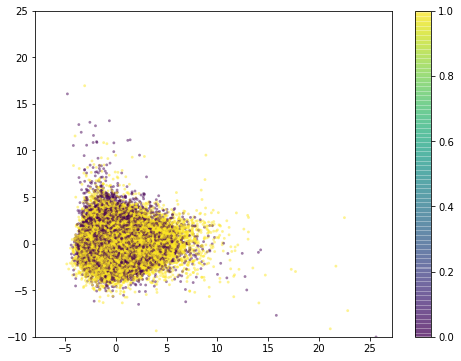

In [412]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_train, edgecolor='none', 
            alpha=0.5, s = 8)
#plt.xlim(-10, 30)
plt.ylim(-10, 25)
plt.colorbar()
plt.show()

## Neural Net

In [328]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torchvision import transforms
from matplotlib.pyplot import figure
from torch.utils.data import Dataset, DataLoader

In [329]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cpu')

In [330]:
class Dataset(Dataset):
    def __init__(self, data, labels, transform = None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        item = self.data[index]
        if self.transform is not None:
            item = self.transform(item)
        return (item, self.labels[index])

In [331]:
batch_size = 64

train_data = Dataset(X_train, y_train)
val_data = Dataset(X_test, y_test)

train_loader = DataLoader(dataset = train_data, batch_size = batch_size,
                              shuffle = True)
val_loader = DataLoader(dataset = val_data, batch_size = batch_size,
                              shuffle = True)

In [367]:
class Net(nn.Module):
    def __init__(self, n = 1000):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(n, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2),
        )
    def forward(self, x):
        x = self.net(x)
        return x

In [373]:
def train_model(model, loss_fn, epochs, train_loader, val_loader, optimizer):

    train_accuracies = []; val_accuracies = []
    train_losses = []; val_losses = []

    model = model.to(device)
    loss_fn = loss_fn.cuda(device)
  
    for epoch in range(epochs):
        correct = 0.0
        cum_loss = 0.0

        for (i, (inputs, labels)) in enumerate(train_loader):
            inputs = Variable(inputs.float().to(device))
            labels = Variable(labels.to(device))
            pred = model(inputs)
            loss = loss_fn(pred, labels)

            _, max_labels = pred.max(1)
            correct += (max_labels == labels).sum().item()
            cum_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i + 1) % 400 == 0:
                print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                    (epoch, i + 1, cum_loss / (i + 1), correct / ((i + 1) * batch_size)))

        train_accuracies.append(correct / len(train))
        train_losses.append(cum_loss / (i + 1))   

        # Validation.
        correct = 0.0
        cum_loss = 0.0
        model.eval()
        for (i, (inputs, labels)) in enumerate(val_loader):
            inputs = Variable(inputs.float().to(device))
            labels = Variable(labels.to(device))

            pred = model(inputs)
            cum_loss += loss_fn(pred, labels).item()

            _, max_labels = pred.max(1)
            correct += (max_labels == labels).sum().item()

        val_accuracies.append(correct / len(X_val))
        val_losses.append(cum_loss / (i + 1))

        # Logging the current results on validation.
        print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
            (epoch, cum_loss / (i + 1), correct / len(val)))
        
    return model, train_accuracies, train_losses, val_accuracies, val_losses

In [374]:
num_epochs = 15
learning_rate = 0.0005

model = Net(n = X_train.shape[1])
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.1)

trained_model, train_acc, train_loss, val_acc, val_loss = train_model(model, criterion, 
                                                num_epochs, train_loader, val_loader, optimizer)

Train-epoch 0. Iteration 00400, Avg-Loss: 0.7884, Accuracy: 0.3646
Train-epoch 0. Iteration 00800, Avg-Loss: 0.7710, Accuracy: 0.3649
Train-epoch 0. Iteration 01200, Avg-Loss: 0.7570, Accuracy: 0.3671
Validation-epoch 0. Avg-Loss: 0.6969, Accuracy: 0.4939
Train-epoch 1. Iteration 00400, Avg-Loss: 0.7093, Accuracy: 0.3738
Train-epoch 1. Iteration 00800, Avg-Loss: 0.7038, Accuracy: 0.3860
Train-epoch 1. Iteration 01200, Avg-Loss: 0.6988, Accuracy: 0.4595
Validation-epoch 1. Avg-Loss: 0.6931, Accuracy: 0.5049
Train-epoch 2. Iteration 00400, Avg-Loss: 0.6804, Accuracy: 0.6326
Train-epoch 2. Iteration 00800, Avg-Loss: 0.6782, Accuracy: 0.6314
Train-epoch 2. Iteration 01200, Avg-Loss: 0.6760, Accuracy: 0.6322
Validation-epoch 2. Avg-Loss: 0.6977, Accuracy: 0.5061
Train-epoch 3. Iteration 00400, Avg-Loss: 0.6672, Accuracy: 0.6360
Train-epoch 3. Iteration 00800, Avg-Loss: 0.6662, Accuracy: 0.6352
Train-epoch 3. Iteration 01200, Avg-Loss: 0.6659, Accuracy: 0.6329
Validation-epoch 3. Avg-Loss: 0

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(range(num_epochs), train_acc, color = "b")
plt.plot(range(num_epochs), val_acc, color = "r")

In [ ]:
plt.figure()
plt.plot(range(num_epochs), train_loss, color = "g")
plt.plot(range(num_epochs), val_loss, color = "y")